Name:- Akash panzade 
   
Roll no. :- 21111006

### Importing python Libraries

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

# Q. 1

In [393]:
csv_file="data_banknote_authentication.txt" #accessing dataset
data=pd.read_csv(csv_file,names=["varience","skewness","curtosis","entropy","class"]) #read file using pandas and use column names

In [394]:
print(data["class"].unique()) #checking no. of different outputs
print(data["class"].astype("category").value_counts())

[0 1]
0    762
1    610
Name: class, dtype: int64


In [395]:
data.dtypes #checking types of columns

varience    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [396]:
data.shape

(1372, 5)

### a) perceptron algorithm

<center>Perceptron Loss function L</center>
$$ L(w) =  \sum_{n=1}^N \max{(0,-y_nw^Tx_n)} $$

<br>
<center> subgradient w.r.t to w </center>

\begin{align*}
 g_n &= 0       \text{   ;   } y_nw^Tx_n\geq 0 \\
      &=-y_nx_n \text{   ;   } y_nw^Tx_n < 0
\end{align*}
<br>
$$ \text{If current w makes mistake on  } (x_n,y_n) \text{  i.e. }  y_nw^Tx_n <0 
$$ <br>
$$ \text{ then , }   w^{(t+1)} = w^t + y_nx_n$$
<br>


In [397]:
def perceptron(x,y,lr):
    # x --> Inputs.
    # y --> labels/target.
    # lr -> learn rate set to 1 as in the slides.
    w=np.array([[0.1,0.1,0.1,0.1]]) # Initializing  weight vector
    i=0  # used i to maintain count
    while(True):
        ind=np.random.randint(len(x)-1,size=1) #selecting random index from dats
        xtemp=x[ind] #input value corresponding to ind
        ytemp=y[ind] #output value corresponding to ind
        if ytemp*np.dot(xtemp,w.T)<0: #check the mistake condition
            w=w+lr*xtemp*ytemp # updating the weight vector w when it makes mistake on current example
            i=0
        if i==100: #converge if no mistakes in consicutive 100 iteration then break
            break
        i+=1
    return w #returning w after training


### b) functions to make predictions

In [398]:
#preprocessing
print(data.isnull().sum()) #checking is there any null values in any columns
print(data.duplicated().sum()) #checking duplicate 
data.drop_duplicates(subset=None, keep='first', inplace=True) #removing duplicate 
# there is no missing values in dataset

varience    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64
24


In [399]:
np_data=data.values #converting dataframe into numpy array
for i in range(len(np_data)): #changing output label o to -1
    if np_data[i][4]==0:
        np_data[i][4]=-1
np.random.shuffle(np_data) #shuffle data

In [400]:
## predict output on the given input based on w
def predict(x,w):
     # if <x,w> if greater than or equal to 0 -> 1, otherwise -> -1
    if np.dot(x,w.T)>=0:
        return 1 
    else:
        return -1
# '-1' for forged  AND  '1' for authentic

### c) training algorithm on dataset using cross-validation

In [401]:
split=int(0.75*np_data.shape[0]) # splitting 75% dataset into train and 25% of held out test set
train=np_data[:split]  #train set (it again divided into validation set and train_set)
test=np_data[split:]  #held out TEST set
fold_indices = np.arange(train.shape[0]) # generating indices 

np.random.shuffle(fold_indices) #randomly shuffle the indices
w1=[] #best weight vector (i.e. for best model)
validation_set=[] # validation set for which error is minimum
pval=float("inf") #initializing min. error value to "inf"

#Split the indices into k-parts ,used 5-fold cross valiation
eval_indices = np.array_split(fold_indices, 5)

for e in eval_indices: #iterating over all 5-folds
    eval_set_x = train[e]  #Define the validation set for the current fold
    mask_eval = np.ones(train.shape[0], bool) 
    mask_eval[e] = False # setting false value for current validation set indices only
    train_set_x = train[mask_eval]  #use other values for training a model
    w=perceptron(train_set_x[:,:4],train_set_x[:,4],1) #training a model for  current train_set
    ytest=eval_set_x[:,4] # input values in current validation set
    xtest=eval_set_x[:,:4]  # input values in current validation set
    ypred=[] 
    for i in range(len(ytest)):
        ypred.append(predict(xtest[i],w)) # predicting value for current input and weight vector
    val=0
    for i in range(len(ypred)):
        if ypred[i]==ytest[i]: # checking predicated output matches with actual output 
            val+=1
    val=(len(ypred)-val)/len(ypred)*100 # calculating % of error for current val.set
#     print("test error for ",p," fold",val)
    if val<pval: #selecting best weight vector for which val. set error is minimum
        w1=w  #updating best weight vector
        pval=val #storing minimum val.set error for w
        validation_set=eval_set_x #storing held out validation set for which model performed well

print("Minimum Error % on validation set by k-fold CV  ",pval)
# print(validation_set)

Minimum Error % on validation set by k-fold CV   2.4752475247524752


In above code dataset divided into two parts i.e in train and test set . further train dataset divided into validation set and train_set(to train algorithm). In above 5-fold cross validation used and in each loop train dataset divided into 5 parts ,from one of this used as validation set and other used as train_set. In each iteration model is train using train_set which gives w that help to performed prediction on current loop validation set model(i.e w) for which validation set error is minimum is used as best model and also stored validation set for that(i.e. validation_set).

In [402]:
## cross validated test set error in % on held out test set.
ytest=test[:,4]
xtest=test[:,:4]
ypred=[]
for i in range(len(ytest)):
    ypred.append(predict(xtest[i],w)) # predicting output for test set inputs
val=0
for i in range(len(ypred)):
    if ypred[i]==ytest[i]: # checking predicated output matches with actual output 
        val+=1
print("cross-validated test set error is ",((len(ypred)-val)/len(ypred))*100)


cross-validated test set error is  4.747774480712167


### d)  Ensure you use a held out validation set and report F1 score on the held out set for your best model.

In [403]:
def f1score(validation_set):
    ytest=validation_set[:,4:] #input value on validation set
    xtest=validation_set[:,:4] #output value on validation set
    ypred=[]
    for i in range(len(ytest)):
        ypred.append(predict(xtest[i],w)) #prediction for  current validation set input using best weight vector
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(ypred)):
        if ypred[i]==-1 and ytest[i]==-1:
            tn+=1
        if ypred[i]==1 and ytest[i]==1:
            tp+=1
        if ypred[i]==-1 and ytest[i]==1:
            fn+=1
        if ypred[i]==1 and ytest[i]==-1:
            fp+=1
            
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    return f1_score
print("F1 score on the held out validation set for best model",f1score(validation_set)) #use the held out validation set which found in part c.

F1 score on the held out validation set for best model 0.9659090909090909


In [404]:
#F1 score for held out test set.
print("F1 score on the held out test set for best model",f1score(test)) #use the held out validation set which found in part c.

F1 score on the held out test set for best model 0.937007874015748


## Q . 2

#### a)

Likelihood value from data , 1.831909946403607e-67


Text(0.5, 1.0, 'Distributions')

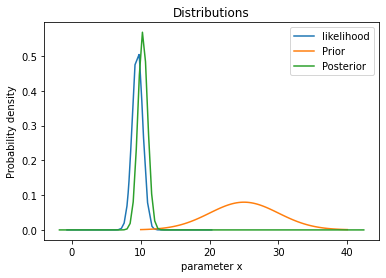

In [410]:
def Bayesian_posterior(prior_mean,prior_std,data_mean,data_std,n): #function return posterior mean and stadard deviation tha used tofind probability
    post_std=np.sqrt(1/(1/prior_std**2+n/data_std**2))
    post_mean=(post_std**2)*(prior_mean/prior_std**2+n*data_mean/data_std**2)
    return post_std,post_mean
# above function Bayesian_posterior helps to find Bayesian Posterior Probability for given data samples and Prior

prior_mean=25
prior_std=5
data_mean,data_std=10,5
n=50
data=np.random.normal(data_mean,data_std,n) #generating random sample from normal distribution with mean=10 and standard deviation =5
post_std,post_mean=Bayesian_posterior(prior_mean,prior_std,data_mean,data_std,n)
#for likelihood
mean=data.mean()
sd=data.std()/np.sqrt(50)
data=sorted(data)
a = ((data - mean) ** 2) / (2 * (sd ** 2))
y = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-a)
pyplot.plot(data, y)

# for prior
x = np.linspace(prior_mean-3*prior_std, prior_mean+3*prior_std, 100)
a = ((x - prior_mean) ** 2) / (2 * (prior_std ** 2))
y = 1 / (prior_std * np.sqrt(2 * np.pi)) * np.exp(-a)
pyplot.plot(x, y) #ploting pdf for prior

#for posterior
x = np.linspace(post_mean-3*post_std-10, post_mean+3*post_std+30, 100)
a = ((x - post_mean) ** 2) / (2 * (post_std ** 2))
y = 1 / (post_std * np.sqrt(2 * np.pi)) * np.exp(-a)
pyplot.plot(x, y) #ploting pdf for posterior
pyplot.legend(["likelihood","Prior","Posterior"])

#likelihood value from data
n=50
data=np.random.normal(10,5,n)
mean=10
sd=5
a = np.sum((data - mean) ** 2) / (2 * sd ** 2)
y = 1 / (np.power(2 * np.pi*sd**2,n/2)) * np.exp(-a)
print("Likelihood value from data ,",y)
pyplot.xlabel("parameter x")
pyplot.ylabel("Probability density")
pyplot.title("Distributions")

Let data $ D = y_1,y_2,.....y_n $ where n=50 ,these sample are generated from Normal distribution with $ \mu=10 $ and $ \sigma =5 . $
<br>
$$y_i \backsim N(\mu,\sigma^2), i=1,2,3,...,n $$
<br>
The likelihood for data  
$$p(D|\mu,\sigma^2)=p(y_1,y_2,...,y_n|\mu,\sigma^2)= \prod_{i=1}^n (2\pi\sigma^2)^{-1/2}e^{\frac{-1}{2}(y_i-\mu)^2/\sigma^2}$$
<br>
Mean ($\bar{y}$) and variance($s^2$) (i.e for data generate) 
$$\bar{y}=\frac{1}{n}\sum_{i=1}^ny_i $$
$$s^2 =\frac{1}{n}\sum_{i=1}^n(y_i-\bar{y})^2$$
<br>
From above expression ,$$ p(D|\mu,\sigma^2)=(2\pi\sigma^2)^{-n/2}e^{\frac{-1}{2\sigma^2}\sum_{i=1}^n(y_i-\mu)^2}$$
<br> by solving above $$p(D|\mu,\sigma^2)\propto e^{\frac{-n}{2 \sigma^2}(\bar{y}-\mu)^2}$$

<br>
For ploting pdf for likelihood of data used values $y_1,y_2,...,y_n$ mean $\bar{y}$ and variance $ s^2$.
<br>

Now to construct posterior distribution $p(\mu|y)$<br>
<br>
Prior with mean $\mu_0=25 $ and $\sigma_0^2=5 $

$$p(\mu) = (2\pi\sigma_0^2)^{-1/2}e^{\frac{-1}{2}(\mu-\mu_0)^2/\sigma_0^2}....$$
<br> for likelihood 
$$p(y_i|\mu,\sigma^2) = (2\pi\sigma^2)^{-1/2}e^{\frac{-1}{2}(y_i-\mu)^2/\sigma^2}$$ 
and hence for Posterior <br>

$$p(\mu|y)=p(\mu) * p(y|\mu,\sigma^2)$$
$$             =(2\pi\sigma_0^2)^{-1/2}e^{\frac{-1}{2}(\mu-\mu_0)^2/\sigma_0^2}\times \prod_{i=1}^N (2\pi\sigma^2)^{-1/2}e^{\frac{-1}{2}(y_i-\mu)^2/\sigma^2} $$<br>
$$\propto e^{(\frac{-1}{2}\mu^2(1/\sigma_0^2+n/\sigma^2)+\mu(\mu_0/\sigma_0^2+\sum_{i} x_i/\sigma^2)}$$<br>
Hence from above equations mean $\mu_n $ and standard deviation $\sigma_n $ of Posterior distribution 
$$\sigma_n^2 = \frac{1}{(\sigma_0^2+n/\sigma^2)}$$  and  $$\mu_n = \sigma_n(\mu_0/\sigma_0^2+\sum_{i} y_i/\sigma^2)$$<br>


#### b)

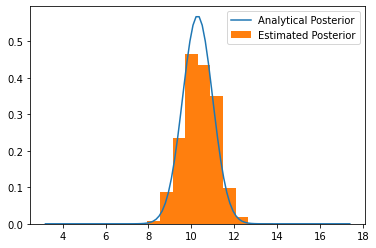

In [409]:
def prior(x,mu,sigma): #function help to calculate the prior for given values
    numerator = np.exp((-(x-mu)*2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator

def randomval(p): 
    unif = np.random.uniform(0,1) #generating random no. between 0 and 1
    if unif>=p:
        return False
    else:
        return True
    
def mcmc(itera,mu,sigma):
    states = [] #list to store sample values
    mu2 = np.random.uniform(-5*sigma+mu,5*sigma+mu) #generate value using current values
    for i in range(itera): 
        states.append(mu2) #storing sample values
        mu1 = np.random.uniform(-5*sigma+mu,5*sigma+mu) #generating new sample value
        curr_prior = prior(x=mu2,mu=mu,sigma=sigma) #finding prior for current values
        new_prior = prior(x=mu1,mu=mu,sigma=sigma) #finding prior for new values
        rho=np.exp((mu2-mu1)*(50*(mu1+mu2)-2*sum(data))/(2*data.std()**2)) #likelihood ratios for current and new sample values
        acceptance = min(new_prior/curr_prior*rho,1) #checing condition
        if randomval(acceptance): 
            mu2 = mu1 #updating value if condition satisfied
    return states

dist = mcmc(10000,mu=0,sigma=5)

#for analytical posterior 
sd=post_std 
mean=post_mean
x = np.linspace(mean-3*sd-5, mean+3*sd+5, 100)
a = ((x - mean) ** 2) / (2 * (sd ** 2))
y = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-a)
pyplot.plot(x, y)#ploting pdf of analytical posterior 
#ploting histogram for generated samples from mcmc
pyplot.hist(dist,density=True) 
pyplot.legend(["Analytical Posterior","Estimated Posterior"])

#used standard deviation 5 and mean =0

#### c)

<ipython-input-406-6c037a8d7660>:21: RuntimeWarning: overflow encountered in exp
  rho=np.exp((mu2-mu1)*(50*(mu1+mu2)-2*sum(data))/(2*data.std()**2)) #likelihood ratios for current and new sample values


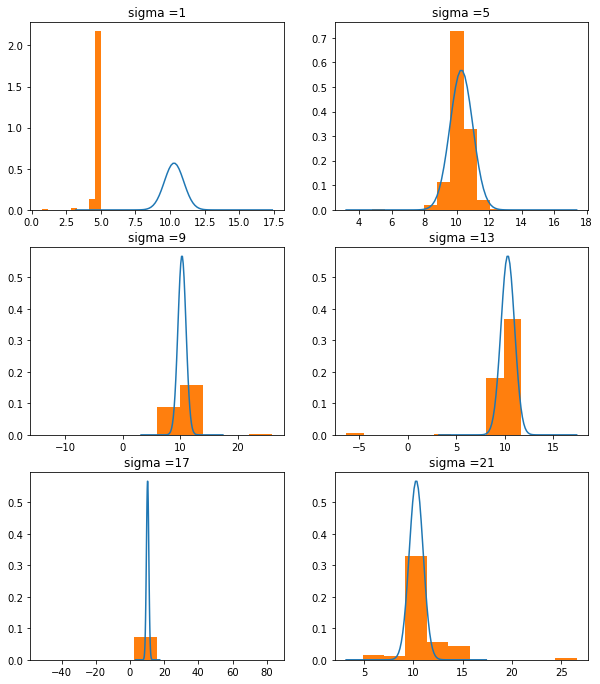

In [407]:
#ploting graph for different values of sigma
i =1
pyplot.figure(figsize=(10, 20))
p=1
while(i<=24):
    pyplot.subplot(5, 2, p)
    dist = mcmc(1000,mu=0,sigma=i)
    #for analytical posterior 
    sd=post_std 
    mean=post_mean
    x = np.linspace(mean-3*sd-5, mean+3*sd+5, 100)
    a = ((x - mean) ** 2) / (2 * (sd ** 2))
    y = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-a)
    pyplot.plot(x, y)#ploting pdf of analytical posterior 
    #ploting histogram for generated samples from mcmc
    pyplot.hist(dist,density=True) 
    pyplot.title("sigma ={}".format(str(i)))
    i+=4
    p+=1


In above graph plotted for different values of standard deviation(for 1,5,9,13,17,21,24)
Estimated and analytical posterior have much different behavior if we used suboptimal standard deviation
and hence speed of convergence is not good for suboptimal values (i.e for 1,13.. etc)
From above we can say for standard deviation 5 it converge much faster with analytical posterior than other values .